🌱 **Project Title**: Sustainable Crop Recommendation System

**Problem Statement**-
Many farmers grow crops that are unsuitable for their soil or climatic conditions, leading to poor yield and excessive fertilizer usage. This harms both the environment and their income.

**Description**-
This project builds a system that recommends the best sustainable crop choices based on soil type, rainfall, and temperature data. Using machine learning or classification algorithms, the model predicts which crops are most suitable while considering environmental sustainability. Insights will show how crop rotation and diversification can improve soil fertility and reduce dependency on chemicals.


In [1]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For encoding
from sklearn.preprocessing import LabelEncoder


In [2]:
from google.colab import files
uploaded = files.upload()


Saving Crop_recommendation.csv to Crop_recommendation.csv


In [3]:
# Load dataset
data = pd.read_csv("Crop_recommendation.csv")

# Show first 5 rows
print(data.head())


    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [4]:
# Shape of dataset
print("Shape of dataset:", data.shape)

# Column names & datatypes
print("\nColumn details:\n")
print(data.info())

# First few rows
print("\nSample rows:\n")
print(data.head())


Shape of dataset: (2200, 8)

Column details:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None

Sample rows:

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42 

In [9]:
# Fill numeric columns with mean
numeric_cols = data.select_dtypes(include=np.number).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Fill categorical columns with mode
categorical_cols = data.select_dtypes(include='object').columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Check again
print("\nMissing values after cleaning:\n", data.isnull().sum())




Missing values after cleaning:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [10]:
print("Duplicate rows before:", data.duplicated().sum())
data = data.drop_duplicates()
print("Duplicate rows after:", data.duplicated().sum())


Duplicate rows before: 0
Duplicate rows after: 0


In [11]:
print(data.describe())


                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


In [12]:
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])

# Show encoded labels
print("\nEncoded Crop Labels:\n", dict(zip(le.classes_, le.transform(le.classes_))))



Encoded Crop Labels:
 {'apple': np.int64(0), 'banana': np.int64(1), 'blackgram': np.int64(2), 'chickpea': np.int64(3), 'coconut': np.int64(4), 'coffee': np.int64(5), 'cotton': np.int64(6), 'grapes': np.int64(7), 'jute': np.int64(8), 'kidneybeans': np.int64(9), 'lentil': np.int64(10), 'maize': np.int64(11), 'mango': np.int64(12), 'mothbeans': np.int64(13), 'mungbean': np.int64(14), 'muskmelon': np.int64(15), 'orange': np.int64(16), 'papaya': np.int64(17), 'pigeonpeas': np.int64(18), 'pomegranate': np.int64(19), 'rice': np.int64(20), 'watermelon': np.int64(21)}


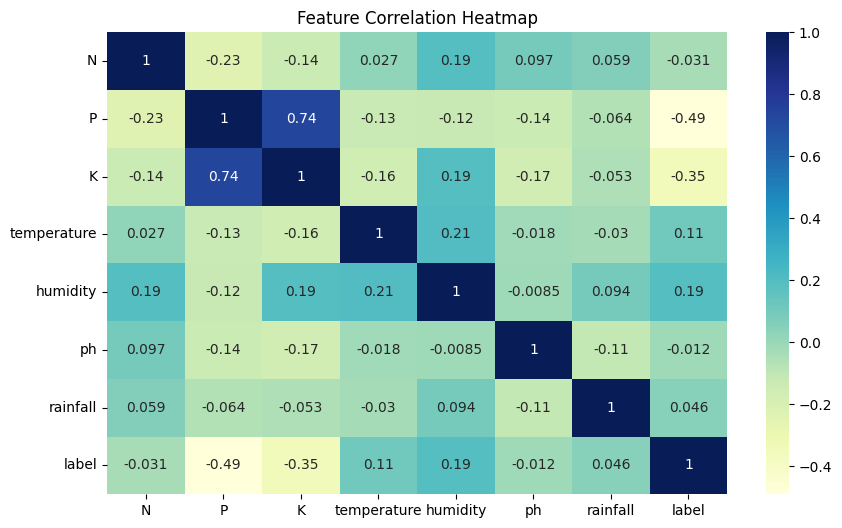

/tmp/ipython-input-3677379643.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=data, palette="viridis")


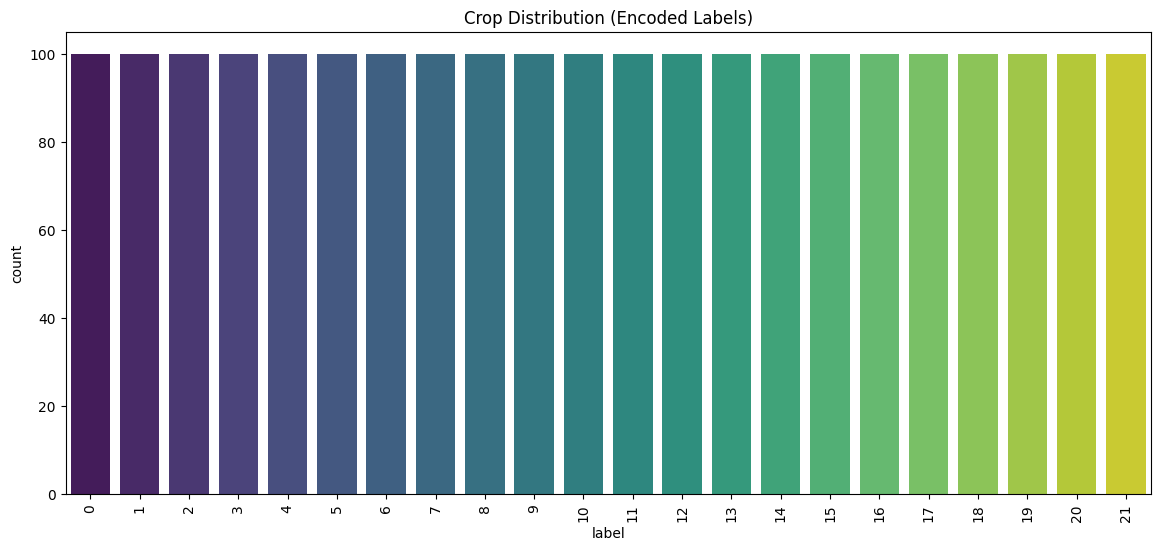

In [13]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.title("Feature Correlation Heatmap")
plt.show()

# Crop distribution
plt.figure(figsize=(14,6))
sns.countplot(x="label", data=data, palette="viridis")
plt.title("Crop Distribution (Encoded Labels)")
plt.xticks(rotation=90)
plt.show()
